In [ ]:
# run class inside module
# Modify the ini file with params
# read spectra from output
# compare to other calculations
import os
import subprocess
#from classy import CLASS
run_class=F
if run_class:
    os.chdir('./class_delens')



In [ ]:
common_settings = {# LambdaCDM parameters
    'H0':67.5,
    'omega_b':0.0222,
    'omega_cdm':0.1197,
    'N_ur':3.046,
    'A_s':2.196e-09,
    'n_s':0.9655,
    'tau_reio':0.055,
    'm_ncdm':0.06,
    'delensing':'yes',
    'output':'tCl,pCl,lCl,dlCl',
    'lensing':'yes',
    'accurate_lensing':1,
    'modes':'s',
    'l_max_scalars':3000,
    'delta_l_max': 1500,
    'temperature noise spectra type':'idealized',
    'polarization noise spectra type':'idealized',
    'lensing reconstruction noise spectra type':'internal',
    'delta_noise':0.000290888209,
    'sigma_beam':0.000290888209,
    'output_spectra_noise':'yes'}

common_settings['sigma_beam']

In [ ]:
# Code to generate a new class_delens ini file based on a dictionary entry

def change_input(fnamein, fnameout,dict):

    key_inds = []
    with open(fnamein, 'r') as f: lines = f.readlines()
    g=open(fnameout, 'w')
    for line in lines:
        if (len(line.split())>0): 
            if '##' not in line.split('=')[0]:
                for i,key in enumerate(dict.keys()):
                    if line.split('=')[0].strip()==key:
                        tmpl = line
                        lst = tmpl.split('=')
                        lst[-1]=str(dict[key])
                        line = '= '.join(lst)+'\n'
                        print(line, 'line2')
        g.write(line)
    g.close()
        

In [ ]:
fnameout = 'test_out.ini'
change_input('test.ini', fnameout,common_settings)

In [ ]:
cmd = "./class %s"%fnameout
print(cmd)
returned_value = subprocess.call(cmd, shell=True) 


In [7]:
import numpy as np
import matplotlib.pyplot as plt
derivs = np.loadtxt('testdat/test_out00_dClTEdClTE_lensed.dat', unpack=True)
# DLM: Derivative of the Cl_TE spectrum with respect to unlensed Cl_TE. 
# Rows are L multipoles at the corresponding Cl_TE, unlensed spectrum; 
# and columns are the l multipoles for the corresponding lensed Cl_TE spectrum.
# for l=2 to 3000, printing if Mod[l,10]==0. 
print(np.shape(derivs))

(300, 2999)


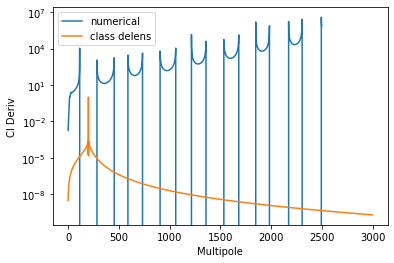

In [13]:
import numpy as np
import matplotlib.pyplot as plt

import SOgen_cov_modules as gcm

labelXY='TE'
labelWZ='TE'
labelList = ['TT','EE','BB','TE']

ell_u,ell_l,specXY_u,specWZ_u,specXY_l,specWZ_l= gcm.get_CMB(labelXY,labelWZ,labelList)

# Default CAMB return is Dl not Cl
specXY_u = gcm.DltoCl(ell_u,specXY_u)
specXY_l = gcm.DltoCl(ell_l,specXY_l)
specWZ_u = gcm.DltoCl(ell_u,specWZ_u)
specWZ_l = gcm.DltoCl(ell_l,specWZ_l)


dspecXY_u_dspecXY_l = gcm.get_deriv(specXY_u, specXY_l, numflag=True)

plt.plot(dspecXY_u_dspecXY_l[20,2:2500], label='numerical')
plt.plot(derivs[20,:], label='class delens')
plt.legend(loc='best')
plt.xlabel('Multipole')
plt.ylabel('Cl Deriv')
plt.yscale('log')